<a href="https://colab.research.google.com/github/danielalejandromartinez/Talento-TECH/blob/main/Codigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

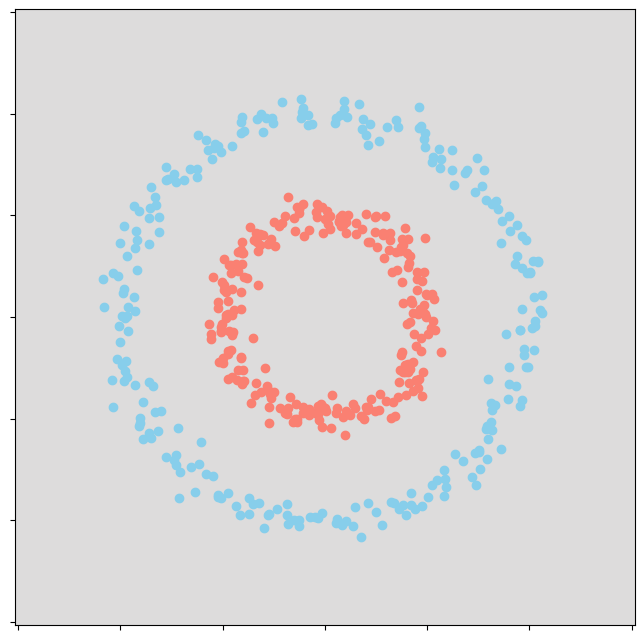

In [50]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

x,y = make_circles(n_samples=500, factor=.5, noise=0.05)
res=100
_x0=np.linspace(-1.5, 1.5, res)
_x1=np.linspace(-1.5, 1.5, res)

_px=np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)
_py=np.zeros((res,res))+0.5

plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_py, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(x[y==0,0],x[y==0,1],c="skyblue")
plt.scatter(x[y==1,0],x[y==1,1],c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

In [48]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML

ix = tf.placeholder('float', shape=[None, x.shape[1]])
iy = tf.placeholder('float', shape=[None])

lr= 0.01
nn = [2,16,8,1]

#capa

w1= tf.Variable(tf.random_normal([nn[0], nn[1]],name='weights_1'))
b1= tf.Variable(tf.random_normal([nn[1]],name='bias_1'))
l1= tf.nn.relu(tf.add(tf.matmul(ix, w1), b1))

w2= tf.Variable(tf.random_normal([nn[1], nn[2]],name='weights_2'))
b2= tf.Variable(tf.random_normal([nn[2]],name='bias_2'))
l2= tf.nn.relu(tf.add(tf.matmul(l1, w2), b2))

w3= tf.Variable(tf.random_normal([nn[2], nn[3]],name='weights_3'))
b3= tf.Variable(tf.random_normal([nn[3]],name='bias_3'))
py= tf.nn.relu(tf.add(tf.matmul(l2, w3), b3))[:,0]

loss=tf.losses.mean_squared_error(py,iy)

optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps=1000
ipy=[]

Step 0 / 1000 - Loss= 24.028374 -Acc= 0.128
Step 25 / 1000 - Loss= 0.5 -Acc= 0.5
Step 50 / 1000 - Loss= 0.5 -Acc= 0.5
Step 75 / 1000 - Loss= 0.5 -Acc= 0.5
Step 100 / 1000 - Loss= 0.5 -Acc= 0.5
Step 125 / 1000 - Loss= 0.5 -Acc= 0.5
Step 150 / 1000 - Loss= 0.5 -Acc= 0.5
Step 175 / 1000 - Loss= 0.5 -Acc= 0.5
Step 200 / 1000 - Loss= 0.5 -Acc= 0.5
Step 225 / 1000 - Loss= 0.5 -Acc= 0.5
Step 250 / 1000 - Loss= 0.5 -Acc= 0.5
Step 275 / 1000 - Loss= 0.5 -Acc= 0.5
Step 300 / 1000 - Loss= 0.5 -Acc= 0.5
Step 325 / 1000 - Loss= 0.5 -Acc= 0.5
Step 350 / 1000 - Loss= 0.5 -Acc= 0.5
Step 375 / 1000 - Loss= 0.5 -Acc= 0.5
Step 400 / 1000 - Loss= 0.5 -Acc= 0.5
Step 425 / 1000 - Loss= 0.5 -Acc= 0.5
Step 450 / 1000 - Loss= 0.5 -Acc= 0.5
Step 475 / 1000 - Loss= 0.5 -Acc= 0.5
Step 500 / 1000 - Loss= 0.5 -Acc= 0.5
Step 525 / 1000 - Loss= 0.5 -Acc= 0.5
Step 550 / 1000 - Loss= 0.5 -Acc= 0.5
Step 575 / 1000 - Loss= 0.5 -Acc= 0.5
Step 600 / 1000 - Loss= 0.5 -Acc= 0.5
Step 625 / 1000 - Loss= 0.5 -Acc= 0.5
Step 650 

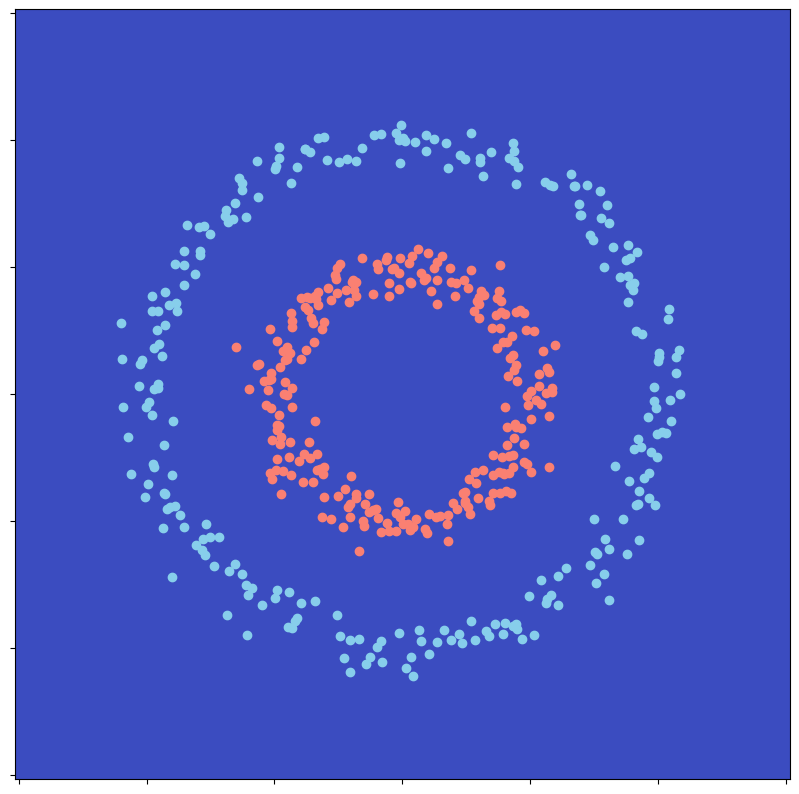

In [49]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range (n_steps):
    _,_loss, _py=sess.run([optimizer,loss, py], feed_dict={ ix:x, iy:y})
    if step % 25== 0:
      acc=np.mean(np.round(_py)==y)
      print('Step', step, '/', n_steps, '- Loss=', _loss, '-Acc=', acc)
      _py= sess.run(py, feed_dict={ix:_px}).reshape((res,res))
      ipy.append(_py)


ims=[]
fig= plt.figure(figsize=(10,10))
print("....Generando animacion....")
for fr in range (len(ipy)):
  im=plt.pcolormesh(_x0,_x1,ipy[fr],cmap='coolwarm', animated=True)
  plt.scatter(x[y==0,0],x[y==0,1],c="skyblue")
  plt.scatter(x[y==1,0],x[y==1,1],c="salmon")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())

In [36]:
import tensorflow as tf
import tensorflow.keras as kr


from IPython.core.display import display, HTML

lr= 0.01
nn = [2,16,8,1]


model = kr.Sequential()


l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))


model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])


model.fit(x,y, epochs=1000)

NotImplementedError: numpy() is only available when eager execution is enabled.

In [39]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


ir  = 0.01
nn = [2,16,8,1]


clf = sk.neural_network.MLPRegressor(solver='sgd',
                                       learning_rate_init=ir,
                                       hidden_layer_sizes= tuple(nn[1:]),
                                       verbose=True,
                                       n_iter_no_change=1000,
                                       batch_size = 64)

clf.fit(x,y)

Iteration 1, loss = 0.66484880
Iteration 2, loss = 0.30658978
Iteration 3, loss = 0.14128097
Iteration 4, loss = 0.12793897
Iteration 5, loss = 0.13481330
Iteration 6, loss = 0.13095376
Iteration 7, loss = 0.12621935
Iteration 8, loss = 0.12517138
Iteration 9, loss = 0.12525406
Iteration 10, loss = 0.12519232
Iteration 11, loss = 0.12516049
Iteration 12, loss = 0.12504289
Iteration 13, loss = 0.12502424
Iteration 14, loss = 0.12507279
Iteration 15, loss = 0.12518187
Iteration 16, loss = 0.12503933
Iteration 17, loss = 0.12508279
Iteration 18, loss = 0.12509813
Iteration 19, loss = 0.12504218
Iteration 20, loss = 0.12509390
Iteration 21, loss = 0.12505165
Iteration 22, loss = 0.12507148
Iteration 23, loss = 0.12505494
Iteration 24, loss = 0.12507285
Iteration 25, loss = 0.12506619
Iteration 26, loss = 0.12503713
Iteration 27, loss = 0.12509114
Iteration 28, loss = 0.12505994
Iteration 29, loss = 0.12505419
Iteration 30, loss = 0.12506614
Iteration 31, loss = 0.12506312
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)